# Proyecto Final
Este es el proyecto final del Curso Especializado Analítica Avanzada de Datos y Machine Learning con Python, impartido por el Ing. Gilberto Almonte.

El dataset que estaremos utilizando se llama "credit_data.xlsx" y contiene las siguientes columnas: 
* 'Age':  Edad de los individuos (rango de 19 a 75 años).
* 'Sex':  Sexo de los individuos (valores posibles: "male" y "female").
* 'Job':  Cantidad de empleos (valores numéricos de 0 a 3).
* 'Housing':  Tipo de vivienda (valores posibles: "own", "free", "rent").
* 'Saving accounts':  Estado de cuentas de ahorro (valores posibles: "little", "moderate", "quite rich", "rich").
* 'Checking account':  Estado de cuentas corrientes (valores posibles: "little", "moderate", "rich").
* 'Credit amount':  Monto del crédito (rango de 250 a 18,424 unidades monetarias).
* 'Duration':  Duración del crédito en meses (rango de 4 a 72 meses).
* 'Purpose':  Propósito del crédito (valores categóricos como "car", "radio/TV", "education", "furniture/equipment", entre otros).
* 'Risk':  Clasificación de riesgo (valores posibles: "good" y "bad").

## Importando librerías
Vamos a inciar importando las librerías clásicas para el tratamiento de los datos.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importar los datos
Vamos a cargar los datos y darle nuestro primer vistazo.

In [5]:
df = pd.read_excel('credit_data.xlsx')

In [6]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# Análisis exploratorio de datos

¡Hagamos algunas exploraciones para identificar datos faltantes y visualizar las relaciones entre las variables con diferentes visuales!


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [9]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [10]:
print(f"Porciento de nulos en Saving accounts: {df['Saving accounts'].isnull().sum()/len(df)*100}%")
print(f"Porciento de nulos en Checking account: {df['Checking account'].isnull().sum()/len(df)*100}%")

Porciento de nulos en Saving accounts: 18.3%
Porciento de nulos en Checking account: 39.4%


Text(0.5, 1.0, 'Impacto de los valores nulos')

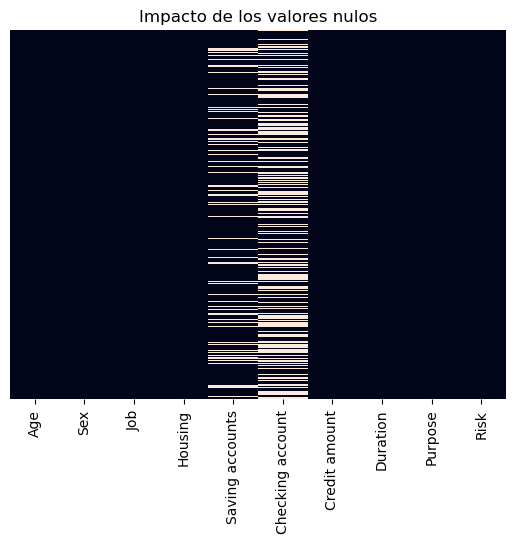

In [11]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Impacto de los valores nulos")

### Observaciones:
* La columna "Saving accounts" tiene 183 valores faltantes, representando el 18% de los datos en esta columna. Por lo tanto, podemos realizar alguna forma de imputación. En este caso, como es una columna que contiene datos en formato texto, vamos a imputar usando de método de la moda categórica.
  
* La columna "Checking account" tiene 394 valores faltantes, representando aproximadamente un 40% de los datos. Por lo tanto, debido a que posee una alta cantidad de valores nulos que pueden afectar el rendimiento y los resultados de nuestros modelos, procederemos a eliminar esta columna.

Text(0.5, 1.0, 'Explorando la moda categórica de la columna Saving accounts')

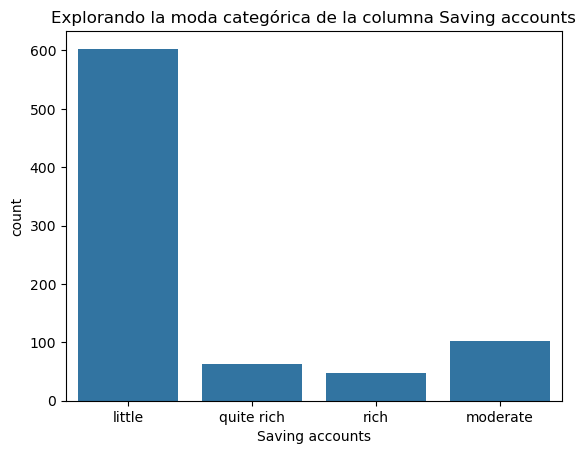

In [13]:
# Mostrando la moda categórica de la columna Saving accounts.
sns.countplot(data=df, x="Saving accounts")
plt.title("Explorando la moda categórica de la columna Saving accounts")

In [14]:
# Imputando valores faltantes en la columna Saving accounts con la moda categorica.
df["Saving accounts"] = df["Saving accounts"].fillna("little")

In [15]:
# Eliminando la columna Checking account.
df = df.drop(columns = ['Checking account'], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1000 non-null   int64 
 1   Sex              1000 non-null   object
 2   Job              1000 non-null   int64 
 3   Housing          1000 non-null   object
 4   Saving accounts  1000 non-null   object
 5   Credit amount    1000 non-null   int64 
 6   Duration         1000 non-null   int64 
 7   Purpose          1000 non-null   object
 8   Risk             1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [17]:
#Reiniciando el índice.
df.reset_index(drop=True, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1000 non-null   int64 
 1   Sex              1000 non-null   object
 2   Job              1000 non-null   int64 
 3   Housing          1000 non-null   object
 4   Saving accounts  1000 non-null   object
 5   Credit amount    1000 non-null   int64 
 6   Duration         1000 non-null   int64 
 7   Purpose          1000 non-null   object
 8   Risk             1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


* ¡Ahora continuamos con el análisis exploratorio de datos, visualizaciones y estadísticas claves para entender mejor las relaciones dentro del dataset!

In [20]:
#observando las estadísticas de nuestras variables númericas.
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [21]:
#Observando las estadísticas de nuestras variables caregóricas.
df.corr(numeric_only=True)

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


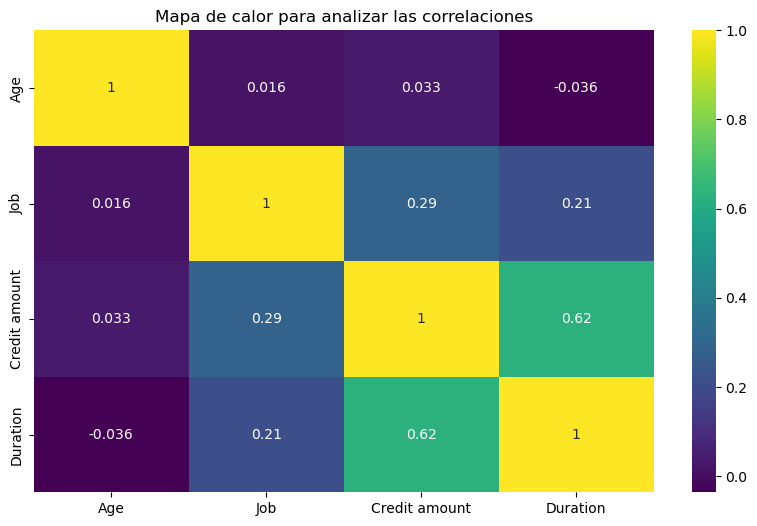

In [22]:
# Mapa de calor para analizar las correlaciones.
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis")
plt.title('Mapa de calor para analizar las correlaciones')
plt.show()

Text(0.5, 1.0, 'Distribución de la columna Risk')

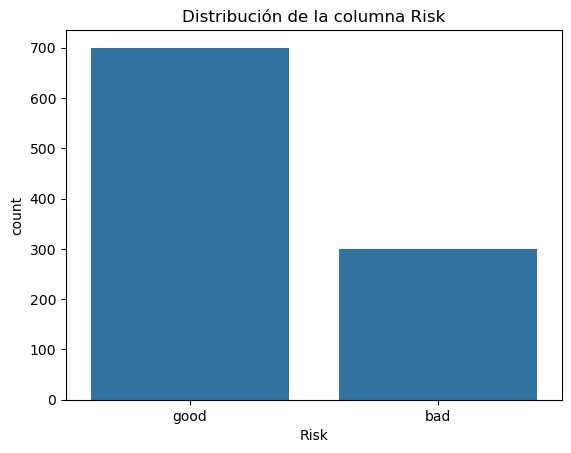

In [23]:
# Observando la Distribución de la columna Risk.
sns.countplot(x='Risk', data = df)
plt.title('Distribución de la columna Risk')

In [24]:
#Verifiquemos la cantidad exacta de los valores en la columna Risk.
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [25]:
#Veamos la distribución normalizada.
df["Risk"].value_counts(normalize=True)

Risk
good    0.7
bad     0.3
Name: proportion, dtype: float64

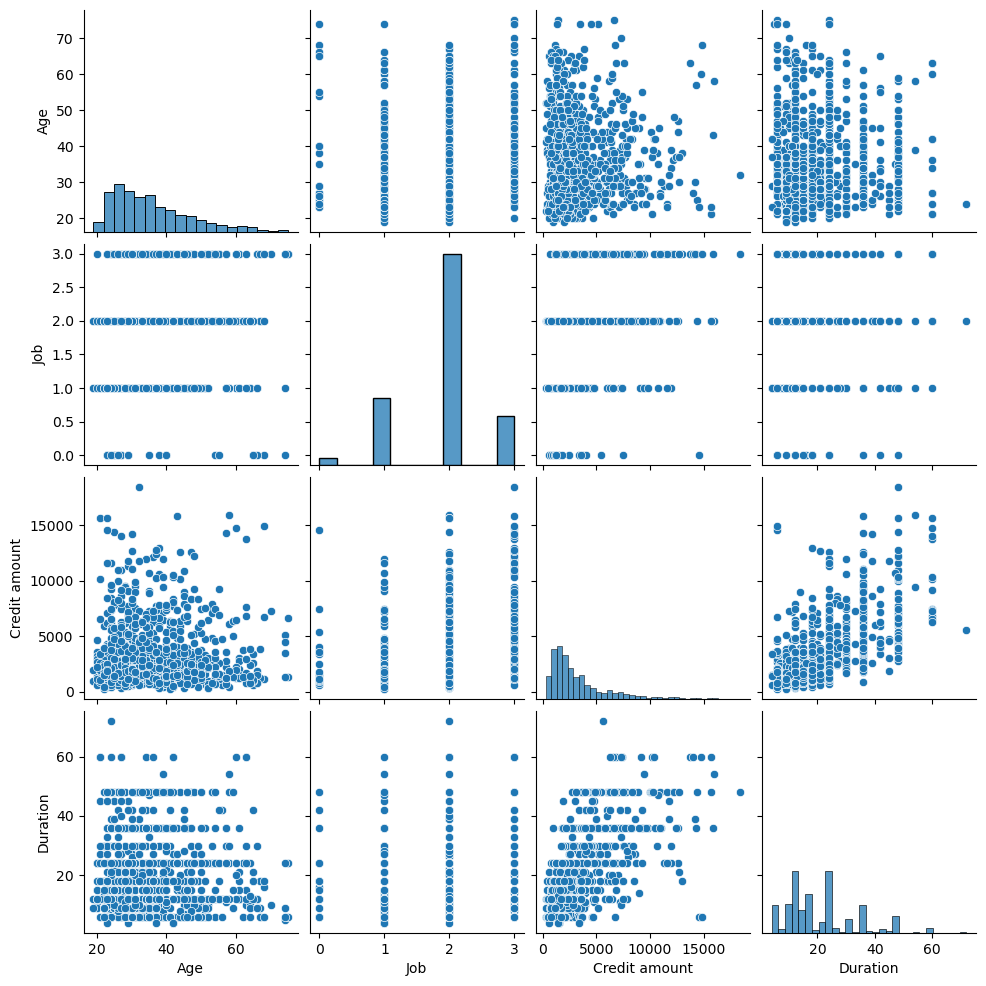

In [26]:
#Observando relaciones entre variables con un pairplot.
sns.pairplot(df)

### Buscando posibles relaciones entre las variables
Observemos más de cerca las relaciones entre las variables, para poder entender un  poco más nuestros datos.

Text(0.5, 1.0, 'Riesgo por Sexo')

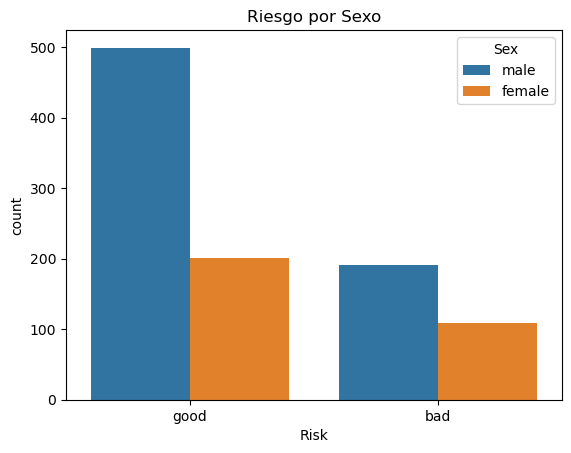

In [28]:
# Riesgo por Sexo.
sns.countplot(x='Risk', hue='Sex', data=df)
plt.title('Riesgo por Sexo')

**Observación**:
* En ambos casos los hombres predominan.

Text(0.5, 1.0, 'Diagrama de caja del Riesgo por Edad')

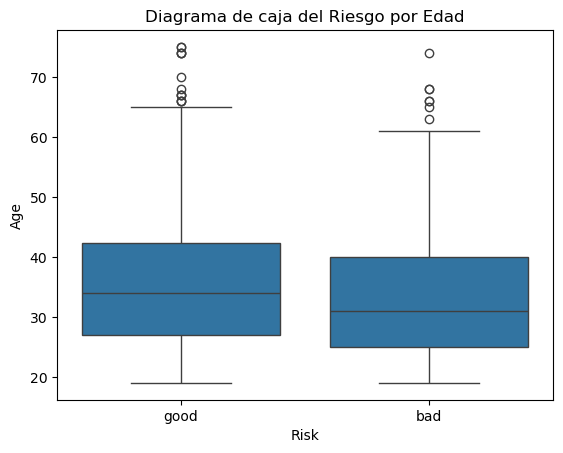

In [30]:
# Diagrama de caja del Riesgo por Edad.
sns.boxplot(x='Risk', y='Age', data=df)
plt.title('Diagrama de caja del Riesgo por Edad')

**Observación**:
* La distribución de las edades con respecto al tipo de riesgo son muy similares.

Text(0.5, 1.0, 'Riesgo por cantidad de trabajos')

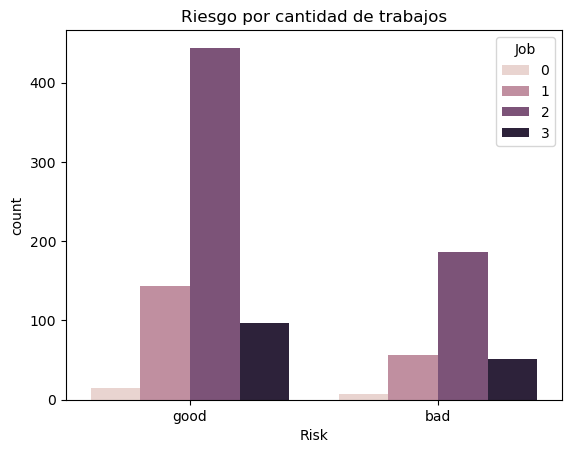

In [32]:
# Riesgo por cantidad de trabajos.
sns.countplot(data=df, x="Risk", hue="Job")
plt.title('Riesgo por cantidad de trabajos')

**Observaciones**:
* En ambos casos, predominan las personas con 2 trabajos.
* Tienen distribución similar.

Text(0.5, 1.0, 'Riesgo por Housing')

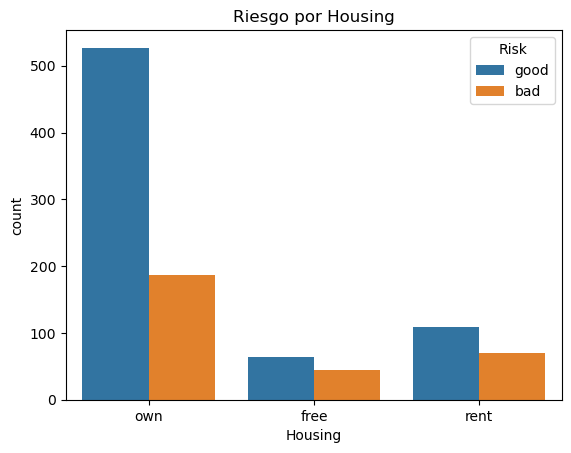

In [34]:
# Riesgo por Housing.
sns.countplot(x='Housing', hue='Risk', data=df)
plt.title("Riesgo por Housing")

**Observación**:
* La distribución del tipo de housing con respecto al tipo de riesgo son todas muy similares.

Text(0.5, 1.0, 'Distribución de las edades')

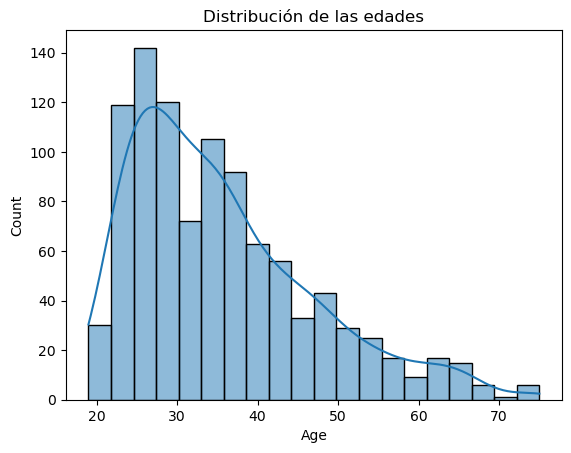

In [36]:
# Distribución de las edades.
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribución de las edades')

**Observación**:
* La distribución de la  columna muestra una mayor concentración en el rango de 20 a 40 años, y va disminuyendo gradualmente en edades mayores.

Text(0.5, 1.0, 'Distribución de Credit Amount')

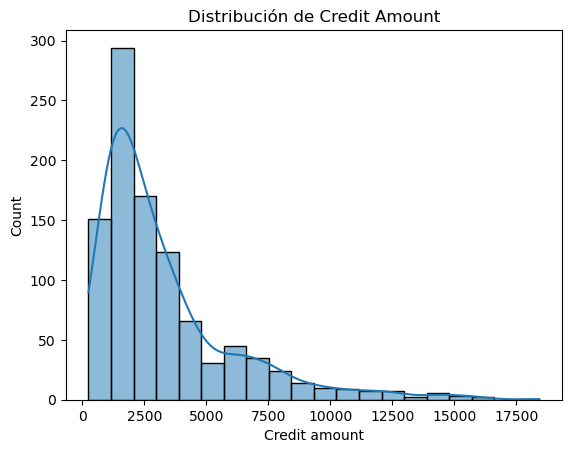

In [38]:
# Distribución de Credit Amount.
sns.histplot(df['Credit amount'], kde=True, bins=20)
plt.title('Distribución de Credit Amount')

**Observación:**
* La distribución de la columna Credit amount esta sesgada hacia la derecha, lo que significa que la mayoría de los créditos son de menor monto, pero hay algunos casos con montos muy altos.

Text(0.5, 1.0, 'Distribucón de la duración')

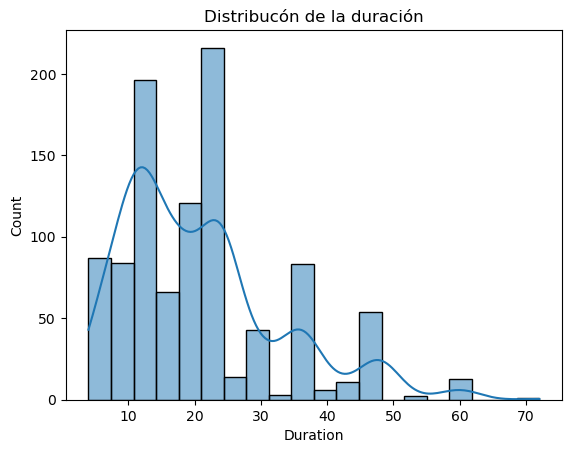

In [40]:
# Distribucón de la duración.
sns.histplot(df['Duration'], kde=True, bins=20)
plt.title('Distribucón de la duración')

**Observación:**
* La distribución de la columna duración muestra una tendencia hacia duraciones más cortas, y se hace más pequeña a medida que la duración aumenta.

## Definición de variables predictoras y variable objetivo

In [43]:
X = df.drop(['Risk'],axis=1)
y = df['Risk']

## Preprocesamiento de datos

In [45]:
from src.preprocessing import preprocessing

In [46]:
X_train, X_test, y_train, y_test, col_transformer, scaler, ohe, cat_cols, num_cols, X_id = preprocessing(X=X, 
                                                                                                         y=y,
                                                                                                         identifier=None,
                                                                                                         scaler=False, 
                                                                                                         winsorize=False)

Fecha y hora de inicio: 2024-09-06 11:51:22
--------------------------------------------------
Valores Nulos
--------------------------------------------------
Age                0
Sex                0
Job                0
Housing            0
Saving accounts    0
Credit amount      0
Duration           0
Purpose            0
dtype: int64
--------------------------------------------------
Fecha y hora de finalización: 2024-09-06 11:51:22
Tiempo transcurrido: 0 horas, 0 minutos y 0 segundos
--------------------------------------------------


In [47]:
X_train.head()

,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_business,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age,Job,Credit amount,Duration
328,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,31.0,2.0,4473.0,36.0
891,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,46.0,2.0,1829.0,15.0
255,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,27.0,1.0,7418.0,60.0
243,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27.0,2.0,1185.0,12.0
492,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,27.0,2.0,1237.0,6.0


In [48]:
X_test.head()

,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_business,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age,Job,Credit amount,Duration
80,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,44.0,2.0,5943.0,24.0
157,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,45.0,1.0,339.0,12.0
65,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,48.0,2.0,5190.0,27.0
489,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,2.0,3518.0,6.0
804,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,7472.0,12.0


# Modelamiento

Para nuestro caso de clasificación utilizaremos el modelo de Regresión Logística.

## Modelo de Regresión Logística

In [51]:
#Importando el modelo.
from sklearn.linear_model import LogisticRegression

### Entrenando el modelo

In [53]:
#Instanciando y entrenando el modelo.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

### Generando predicciones

In [55]:
predicciones = logmodel.predict(X_test)

### Evaluando el modelo

In [57]:
#Importando las métricas.
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

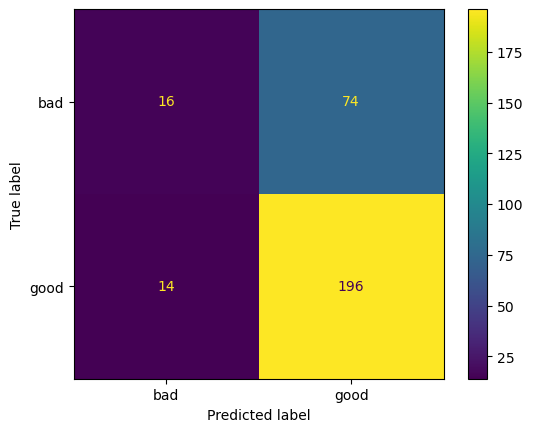

In [58]:
cm = confusion_matrix(y_test, predicciones, labels=logmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logmodel.classes_)
disp.plot()
plt.show()

In [59]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         bad       0.53      0.18      0.27        90
        good       0.73      0.93      0.82       210

    accuracy                           0.71       300
   macro avg       0.63      0.56      0.54       300
weighted avg       0.67      0.71      0.65       300



**Observación**

* Note que el accuracy es de 0.71; sin embargo, en vista de que tenemos un desbalance en los datos, observamos que el modelo predijo muy bien para los casos buenos y muy mal para los casos malos.
* Utilizaremos la técnica de SMOTE para balancear los datos y tratar de obtener mejores resultados.

In [61]:
#pip install imblearn

In [62]:
# Importando SMOTE.
from imblearn.over_sampling import SMOTE
#Instanciando SMOTE.
sm = SMOTE()

#Balanceando los datos.
sm_X_train, sm_y_train = sm.fit_resample(X_train, y_train)

In [63]:
#Observando los datos antes del SMOTE.
y_train.value_counts()

Risk
good    490
bad     210
Name: count, dtype: int64

In [64]:
#Observando los datos después del SMOTE.
sm_y_train.value_counts()

Risk
good    490
bad     490
Name: count, dtype: int64

In [65]:
#Volvemos a entrenar el modelo con los datos balanceados.
logmodel_sm = LogisticRegression()
logmodel_sm.fit(sm_X_train, sm_y_train)

LogisticRegression()

In [66]:
# Generando predicciones con los datos balanceados.
pred_logmodel_sm = logmodel_sm.predict(X_test)

### Evaluando el modelo después de balancear los datos con SMOTE

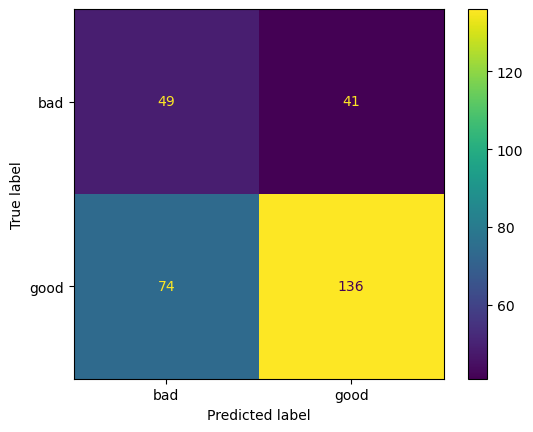

In [68]:
cm = confusion_matrix(y_test, pred_logmodel_sm, labels=logmodel_sm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logmodel_sm.classes_)
disp.plot()
plt.show()

In [69]:
#Comparando los resultados Regresion sin SMOTE vs Regresion con SMOTE.
print("Regresion sin SMOTE")
print(classification_report(y_test,predicciones))

print("Regresion con  SMOTE")
print(classification_report(y_test, pred_logmodel_sm))

Regresion sin SMOTE
              precision    recall  f1-score   support

         bad       0.53      0.18      0.27        90
        good       0.73      0.93      0.82       210

    accuracy                           0.71       300
   macro avg       0.63      0.56      0.54       300
weighted avg       0.67      0.71      0.65       300

Regresion con  SMOTE
              precision    recall  f1-score   support

         bad       0.40      0.54      0.46        90
        good       0.77      0.65      0.70       210

    accuracy                           0.62       300
   macro avg       0.58      0.60      0.58       300
weighted avg       0.66      0.62      0.63       300



**Observación:**
* Note que luego de utilizar SMOTE para balancear los datos, nuestro modelo de Regresión Logística mostró mejoras significativas.
* Precisión: El modelo tiene una precisión de 40% para el riesgo "malo" y 77% para el riesgo "bueno". 
* Recall: Es de 54% para el riesgo "malo", y de 65% para el riesgo "bueno". 
* F1-Score: Es de 0.46 para riesgo "malo" y 0.70 para riesgo "bueno", mostrando mejor rendimiento para el segundo caso. 

## Modelo de Regresión Lineal
Para nuestro caso de regresión, utilizaremos el modelo por excelencia de Regresión Lineal.
La variable objetivo será el "credit amount" y desecharemos las columnas que tienen información de texto que el modelo de regresión lineal no puede usar.

### Definición de variables predictoras y variable objetivo

In [73]:
X = df.drop(columns= ['Sex', 'Housing', 'Saving accounts', 'Credit amount', 'Purpose', 'Risk'])
y = df['Credit amount']

In [74]:
#Importando el train_test_split.
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Entrenado el modelo

In [77]:
#Importando el modelo de Regresión Lineal.
from sklearn.linear_model import LinearRegression

In [78]:
#Instanciando el modelo.
lm = LinearRegression()

#Entrenando modelo
lm.fit(X_train, y_train)

LinearRegression()

### Generando las predicciones

In [80]:
predicciones= lm.predict(X_test)

### Observando el rendimiento del modelo

Text(0.5, 1.0, 'Rendimiento del modelo')

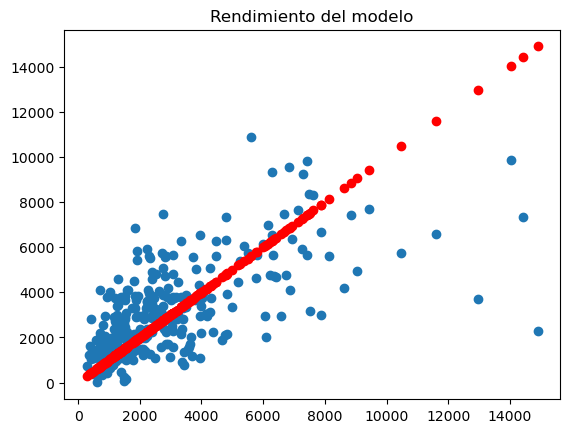

In [82]:
plt.scatter(y_test, predicciones)
plt.scatter(y_test, y_test, color = 'r')
plt.title('Rendimiento del modelo')

### Distribución de Residuos

<Axes: xlabel='Credit amount', ylabel='Count'>

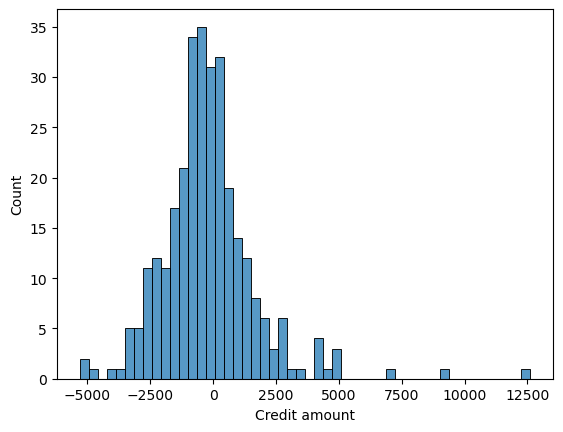

In [84]:
sns.histplot(y_test - predicciones, bins=50)

### Evaluando el modelo en función del R cuadrado

In [86]:
from sklearn.metrics import r2_score

In [87]:
print(f"El r2_score es: {r2_score(y_test, predicciones)}")

El r2_score es: 0.36107239907278843


**Observación:**

El modelo de regresión lineal obtuvo un valor de r2_score = 0.3610, lo cual indica que aproximadamente el 36.1% de la variabilidad en el Credit amount es explicada por las variables independientes del modelo.

## Modelo de segmentación KMeans 
Ahora, realizaremos el modelo de segmentación utilizando K-means para las variables Age, Credit Amount, y Duration. ​

In [90]:
df = df.drop(columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Purpose', 'Risk'])

### Seleccionando los K grupos más optimos

In [92]:
#normalizando variables.
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)

In [93]:
#pip install yellowbrick

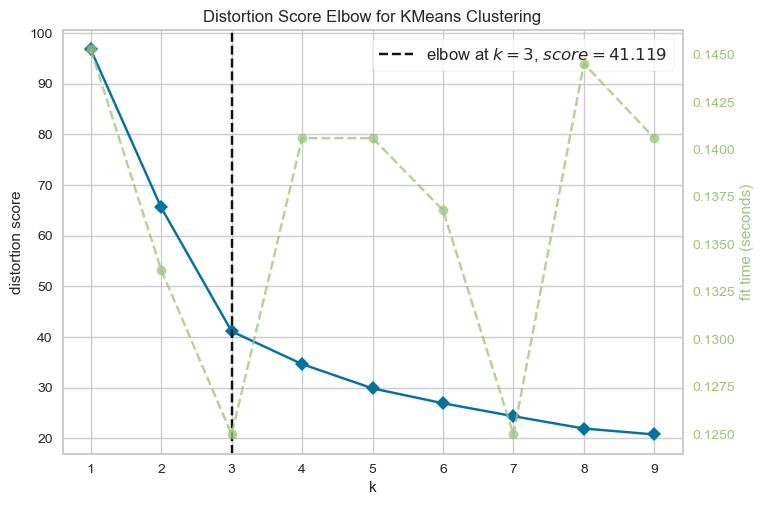

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
from yellowbrick.cluster import KElbowVisualizer

# Crear una instancia del visualizador y modelo de agrupación en clústeres.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df_scaled)
visualizer.show()

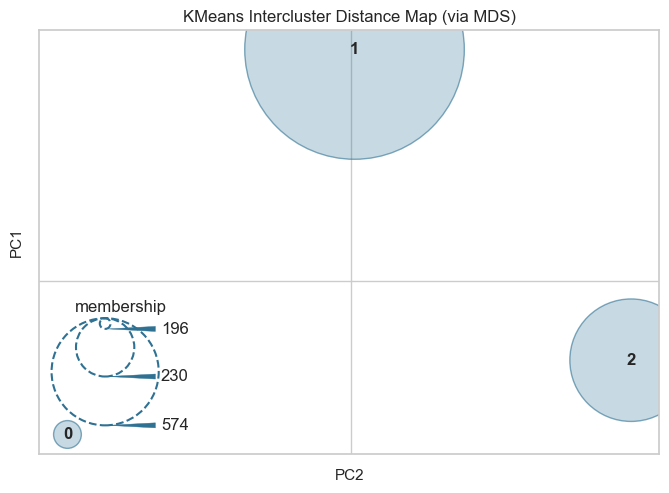

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [95]:
from yellowbrick.cluster import InterclusterDistance

# Crear una instancia del visualizador y modelo de agrupación en clústeres.
model = KMeans(3)
visualizer = InterclusterDistance(model)

visualizer.fit(df_scaled)
visualizer.show()

In [96]:
model = KMeans(n_clusters=3)
model.fit(df_scaled)

KMeans(n_clusters=3)

In [97]:
df['Cluster'] = pd.Series(model.labels_)

In [98]:
from sklearn.metrics import silhouette_score

X = df_scaled
y = model.labels_
silhouette_score(X,y,metric = 'euclidean')

0.4079980869885929

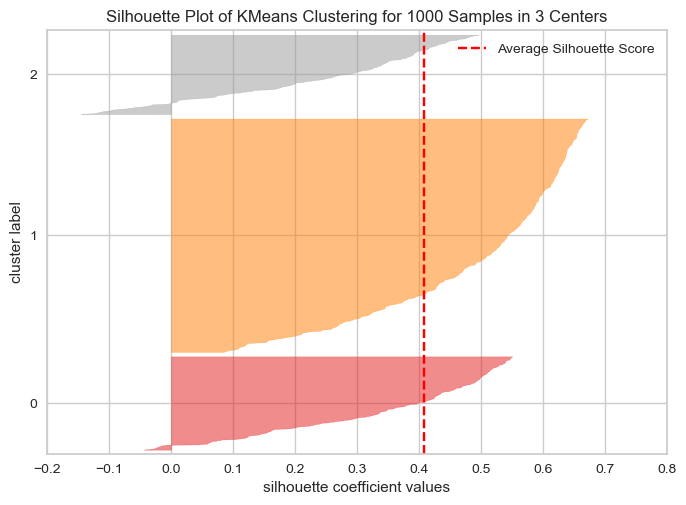

In [99]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_scaled)       
visualizer.show()
plt.show()

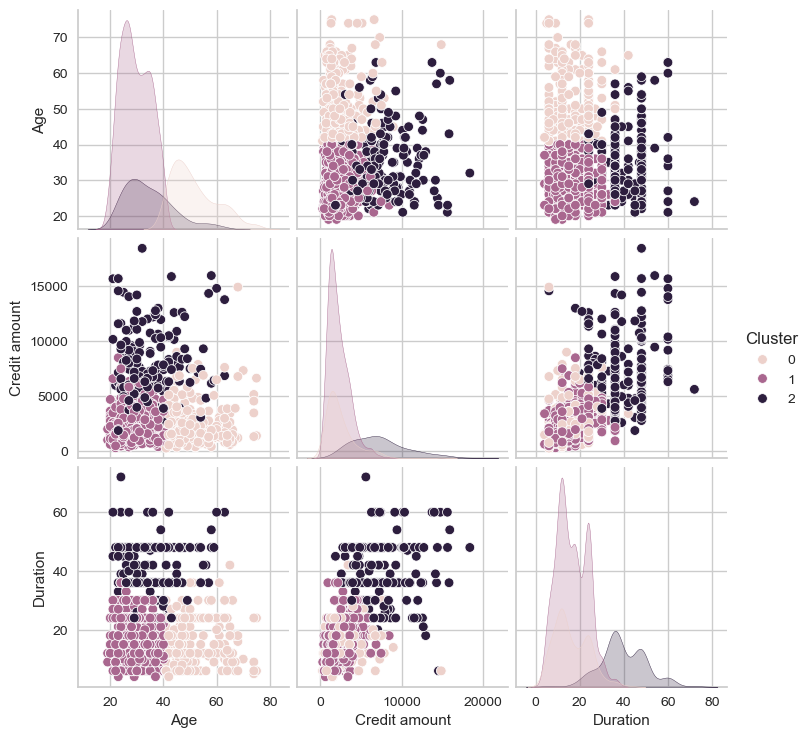

In [100]:
sns.pairplot(df, hue= 'Cluster')

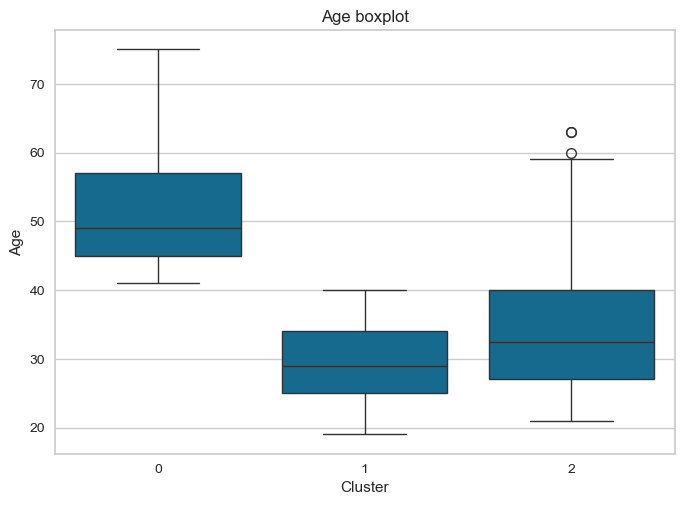

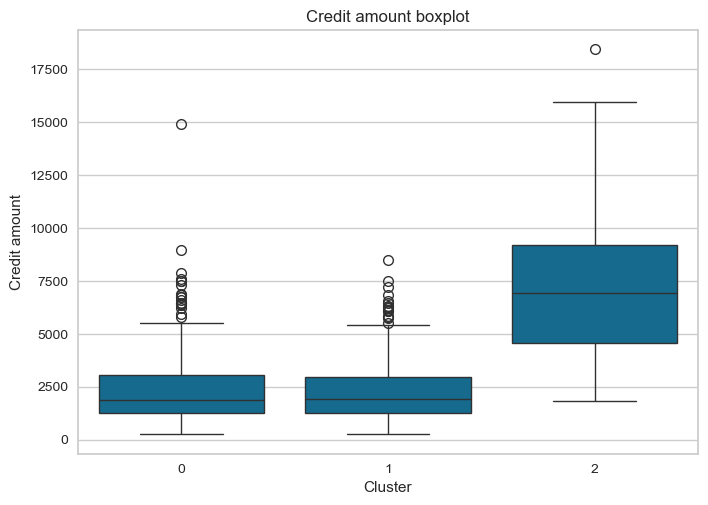

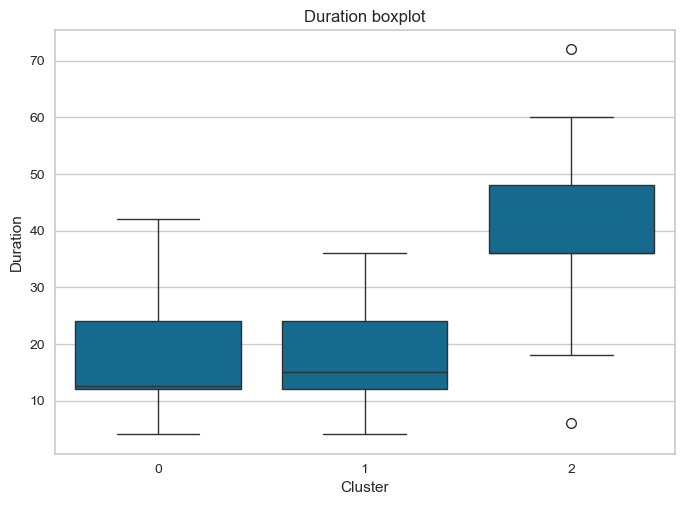

In [101]:
for col in df.drop(columns = ['Cluster']).columns:
    sns.boxplot(data=df, x="Cluster", y=col)
    plt.title(col +' boxplot')
    plt.show()

**Observciones:**
* El gráfico sugiere que un buen número de clusters podría ser 3, ya que a partir de ese punto la disminución de la inercia se hace menos pronunciada.
* El coeficiente de silueta es aproximadamente 0.408, lo cual indica que los clusters están bien definidos y los puntos dentro de los clusters son bastante similares entre sí.

# Conclusiones

* Transformación y Limpieza: Se gestionaron los valores faltantes y se codificaron las variables categóricas adecuadamente. 
* Análisis Exploratorio: Reveló distribuciones sesgadas y correlaciones clave que ayudaron a entender mejor los datos.
* Modelo de Clasificación: El modelo de clasificación tuvo un rendimiento moderado, con mejor precisión en identificar los casos de buen riesgo.
* Modelo de Regresión: El modelo de regresión lineal mostró un rendimiento moderado con un R² de 0.361.
* Modelo de Segmentación: La segmentación con K-means mostró buenos resultados con 3 clusters bien definidos y proporcionó un coeficiente de silueta aceptable para la agrupación.